<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png"><br />

Created by Zhuo Chen for [Constellate](https://constellate.org) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/).<br />
For questions/comments/improvements, email zhuo.chen@ithaka.org.<br />

# Data Visualization

This is lesson 1 of 3 in the educational series on **Data Visualization**. 

**Description:** This notebook discusses:

* What is a good visualization
* How one can lie using data visualizations
* Factors to consider when making data visualizations

**Use case:** For Learners (Detailed explanation, not ideal for researchers)

**Difficulty:** Intermediate

**Completion time:** 90 minutes

**Knowledge Required:** 

* Python basics ([start learning Python basics](./python-basics-1.ipynb))
* Pandas ([start learning Pandas](./pandas_1.ipynb))

**Knowledge Recommended:**

Objects, attributes and methods (start learning [object-oriented programming](./python_intermediate_4.ipynb))

**Data Format**: .csv

**Libraries Used**: pandas, geoPandas, Matplotlib

**Research Pipeline**: None

___

# Introduction

In our daily life, we are exposed to all kinds of visualizations, on TV, social media, newspapers, magazines, websites, etc. 

In this series, we focus on data visualizations. Particularly, we focus on the data visualizations designed to **inform the audience** so as to **increase their understanding**. Those data visualizations made to entertain or sell products are not the topic of this series. 

# What is a good visualization?

In his book [The Truthful Art](http://www.thefunctionalart.com/p/the-truthful-art-book.html), Alberto Cairo proposes a five-part framework to evaluate the qualities of a data visualization. He says that a good data visualization should be :

* Truthful
* Functional
* Beautiful
* Insightful
* Enlightening


## Truthful

A good data visualization is truthful. This requires us to:

* be honest with ourselves; 
* be honest with our audience 

First, we should be honest with ourselves. Ask whether the way we clean and summarize the data biases toward a certain conclusion. We should not have a pre-determined conclusion in mind and then look for data to support it. 

Second, we should be honest with our audience. We use data visualizations to convey our best understanding of the reality. If a data visualization hides data from the audience or misleads the audience, it is not a good data visualization no matter how clear and attrative it is. 

### Charts can deceive

The 2021 Hulu drama series Dopesick features [an example](https://www.youtube.com/watch?v=y305az3PQLk) of how a visualization can be used to mislead. Understanding how charts can deceive is an important skill for data scientists.

### Exercise

Here is an example from [How Charts Lie](http://www.thefunctionalart.com/p/reviews.html) authored by Alberto Cairo. In July 2012, Fox News uses a chart to argue for a consequence of President Barack Obama's plan to let President George W. Bush's cuts to the top federal tax rate expire. The percent number on the red bar is hiddedn right now. What message do you think Fox News wants to convey in this chart?


<img src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz_BarTax1.png" width=500>

Now with the number revealed, do you still believe the message intended by the chart?

<img src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz_BarTax2.png" width=500>

## Functional

When we talk about whether a graphic is functional, we mean whether the chosen graphic form best helps the audience interpret the conveyed information. There are two main questions to consider when choosing a graphic form:

* What purpose does the graphic serve? 

To answer this question, think about what kind of information the audience seeks when reading the graphic.

* How to shape the information to help the audience achieve the purpose?

To answer this question, think about how you could shape the information in a way that people can interpret easily and effectively.  

### The importance of the form of a graphic

In his book [The Functional Art](http://www.thefunctionalart.com/p/about-book.html), Alberto Cairo emphasizes that functions constrain forms. In this section, we will see how the function of a data visualization influences the choice of its form.

Suppose you are interested in the workforce data in Massachusetts. You would like to find out the data for November and December of 2022 in different counties of the state. There is a specific question that you are interested in: 

1. Which county saw the biggest growth in unemployent rate from November to December?

As a reader, which graphic would you choose? 

#### Graphic 1

In [1]:
# Download the data
import urllib.request
import zipfile
from pathlib import Path

urls = ['https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz1_CountyComparison_preprocessed.csv',
       'https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/counties.zip']
for url in urls:
    urllib.request.urlretrieve(url, './data/' + url.rsplit('/', 1)[-1])
    
with zipfile.ZipFile("./data/counties.zip", "r") as zip_ref:
    zip_ref.extractall("./data/counties")

countyzip_path = Path.cwd() / 'data' / 'counties.zip'
countyzip_path.unlink()
print('Samples files retrieved.')

Samples files retrieved.


In [2]:
# Install geopandas
!pip install geopandas

In [3]:
# Use magic function to set the backend
%matplotlib inline

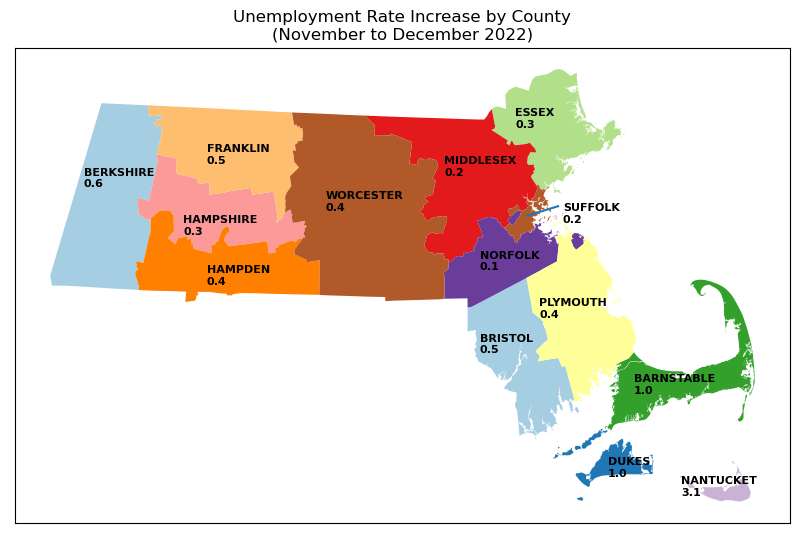

In [4]:
# Plot the unemployment rate increase by county in MA 
# On a county map of MA

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read in the unemployment data in Nov&Dec of 2022
unemp = pd.read_csv('./data/DataViz1_CountyComparison_preprocessed.csv') 

# Create a new column storing the change in umemployment rate
unemp['Difference'] = round(unemp['Dec Rate'].astype(float) - unemp['Nov Rate'].astype(float),2)

# Remove the unnecessary columns
unemp = unemp[['COUNTY', 'Difference']]

# Preprocess the COUNTY column to prepare for later merging
unemp['COUNTY'] = unemp['COUNTY'].str.upper()

# Read in the geo data
geo = gpd.read_file('./data/counties/COUNTIES_POLYM.shp')

# Remove the unnecessary column
geo = geo[['COUNTY', 'geometry']]

# Merge the two dfs
geo_unemp = geo.merge(unemp, on='COUNTY')

# Add the longitude and latitude info for each county
# to be used to add county name and unemployment data
# to the map later
geo_unemp['Longitude'] = [48000,
                          215000, 
                          269000, 
                          230000, 
                          280000, 
                          90000, 
                          200000, 
                          100000, 
                          100000, 
                          300000, 
                          215000, 
                          240000,
                          250000,
                          150000]

geo_unemp['Latitude'] = [910000,
                         840000, 
                         788000, 
                         935000, 
                         823000, 
                         890000, 
                         915000, 
                         920000, 
                         869000, 
                         780000, 
                         875000, 
                         855000,
                         895000,
                         900000]

# Plot the map
ax_geo = geo_unemp.plot(figsize=(10, 10),scheme="quantiles", cmap='Paired', legend=True)

# Add the county name and unemployment rise/drop on the map
for i in range(len(geo_unemp)):
    plt.text(geo_unemp.Longitude[i],
             geo_unemp.Latitude[i],
             f"{geo_unemp.COUNTY[i]}\n{geo_unemp.Difference[i]}",
             size=8, weight='bold', color='black')

# Add a line in the plot for Suffolk county
ax_geo.plot([235000, 248000], [898000, 902000])

# Add a title to the plot
ax_geo.set_title('Unemployment Rate Increase by County\n(November to December 2022)',fontsize=12)

# Remove the ticks
ax_geo.set_xticks([])
ax_geo.set_yticks([]);

#### Graphic 2

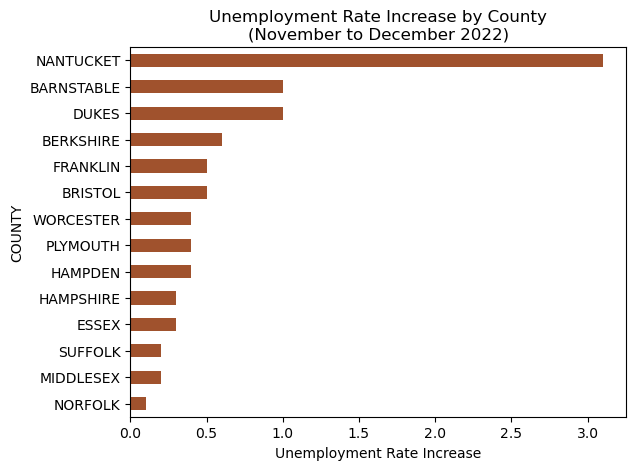

In [5]:
# Prepare the data to be ploted
geo_unemp = geo_unemp.sort_values(by='Difference')
 
# Specify the x axis and y axis data
ax_barh = geo_unemp.plot(x='COUNTY', y='Difference', kind='barh', color='sienna', legend=None)

# Set the title
ax_barh.set_title('Unemployment Rate Increase by County\n(November to December 2022)',fontsize=12);

# Add the xlabel
ax_barh.set_xlabel('Unemployment Rate Increase');

In the above scenario, you have made a choice as a reader. It is a good practice to put yourself in the shoes of the target readers because it helps you choose the functional graphic form. 

## Beautiful

When it comes to information charts, i.e., the kind of data visualization we focus on in this series, many experts resist using visual embellishments because they think such excessive elements are distracting and often cause interpretation problems. Edward R. Tufte, for example, calls the embelliments in charts *chartjunk*. He argues that a good visual design communites the most possible information using the least possible ink. On the other hand, however, research shows that embellishments can be useful because they sometimes help comprehension and lead to long-term recall ([Bateman et al. 2010](https://www.researchgate.net/publication/221517808_Useful_Junk_The_effects_of_visual_embellishment_on_comprehension_and_memorability_of_charts)). 

Let's take a look at an example from [Bateman et al.'s](https://www.researchgate.net/publication/221517808_Useful_Junk_The_effects_of_visual_embellishment_on_comprehension_and_memorability_of_charts) paper. 

There are two charts in this paper that present exactly the same information: the price change of a one-carat D-flawless diamond from 1978 - 1982. If you are a reader, which chart do you think is more effective in terms of conveying this information? 


### The Beauty Paradox

In his book [The Functional Art](http://www.thefunctionalart.com/p/about-book.html), Alberto Cairo uses the term "the beauty paradox" to describe the difficult choice between the minimalist design and the embellished design. If you ask which design is better, there is no absolute right answer. It depends on the audience, their knowledge, taste, expectations, etc. 

Despite the seeming conflict between the two approaches to visual design, however, Alberto Cairo argues that a middle ground can be found between them. After all, the ultimate goals of making a visual deisgn are shared by the two approaches. That is, a visual design presents information and it helps the readers explore that information. Using these two goals as guiding principles, the creators will achieve a balance between radical minimalism and the so-called chartjunk kind of design. 

## Insightful

According to [Chang et al.](https://viscenter.charlotte.edu/sites/viscenter.charlotte.edu/files/CVC-UNCC-08-34_0.pdf)(2009), there are several kinds of insight in visualizations. One is **spontaneous insight**. Spontaneous insight often comes directly from the graphic summary of the data. For example, in the previous section, we have seen two graphics showing the price change of a one-carat D-flawless diamond from 1978 - 1982. We immediately noticed the spike in 1980. This is the spontaneous insight we got from the graphics.

Another kind of insight is **knowledge-building insight**. When we play with an interactive visualization, it allows us to explore the information in a gradual way and in this deliberate process of exploration, we often get more knowledge. 

Here is an example from [The Truthful Art](http://www.thefunctionalart.com/p/the-truthful-art-book.html). 

https://www.scientificamerican.com/article/how-nations-fare-in-phds-by-sex-interactive1/

On this page you find an interactive graphics that shows the PhD gender gap by country. If we do not categorize the areas of the PhD degrees, you see that the US does really a good job in awarding about the same percentage of PhD degrees to both females and males. 

Now click the little arrow to the left of "All PhDs" to access "Social and Behavioral", what do you find? 

Now click the little arrow to access "Math & Computer Science", what do you find?



## Enlightening

An enlightening graphic sheds light on the topic it encodes information for. When we make visualizations, we would want to choose topics that are of more importance to the well-being to the human society. 

In the PhD gender gap graphic, for example, the topic is well chosen as it provokes people to think about the gender inequality in science and engineering. Calling policy-makers' attention to such gender gap may lead to efforts to promote gener equity in the education of science and engineering. 

The four qualities discussed in the previous sections are the prerequisites of making an enlightening graphic. To make an enlightening graphic,we will need to make it truthful, functional, beautiful and insightful. 

# A quick review of Pandas

Before making a data visualization, we always need to preprocess the raw data at hand to prepare for plot-drawing later. In the previous section, we have seen an example where we study the unemployment data in Massachusetts. In that example, the sample .csv file has been preprocessed in advance to help you focus on the steps of creating a visualization. In this section, as a review of Pandas, I will let you download the original .csv file from [Mass.gov](https://lmi.dua.eol.mass.gov/lmi/LaborForceAndUnemployment/CountyComparison) and preprocess it. 

___
<h2 style="color:red; display:inline">Coding Challenge! &lt; / &gt; </h2>

Preprocess the original .csv file from Mass.gov to make it exactly the same as the 
___

In [6]:
# Download the raw file from the link Mass.gov
# Save it to the data folder


In [7]:
# Create a dataframe from the raw file

In [8]:
# Use .head() method to take a look at 
# the preprocessed file and the raw file


In [9]:
# Use what you have learned from Pandas class
# to preprocess the data in the raw file to make 
# the raw file look the same as the preprocessed file


# References

Bateman, S., Mandryk, R. L., Gutwin, C., Genest, A., McDine, D., & Brooks, C. (2010, April). Useful junk? The effects of visual embellishment on comprehension and memorability of charts. In *Proceedings of the SIGCHI conference on human factors in computing systems* (pp. 2573-2582).

Cairo, A. (2012). *The Functional Art: An introduction to information graphics and visualization*. New Riders.

Cairo, A. (2016). *The Truthful Art: Data, charts, and maps for communication*. New Riders.

Cairo, A. (2019). *How Charts Lie: Getting smarter about visual information*. WW Norton & Company.

Chang, R., Ziemkiewicz, C., Green, T. M., & Ribarsky, W. (2009). Defining insight for visual analytics. *IEEE Computer Graphics and Applications, 29*(2), 14-17.

___
## Lesson Complete

Congratulations! You have completed *Data Visualization 1*.

### Start Next Lesson: [Data Visualization 2](./data_vis2.ipynb)

### Exercise Solutions
Here are the solution for the coding exercise in this lesson.

#### Use Pandas to preprocess an example .csv file

In [10]:
# Download the raw file
import urllib.request
url = 'https://lmi.dua.eol.mass.gov/lmi/LaborForceAndUnemployment/CountyComparisonCSV'
urllib.request.urlretrieve(url, './data/' + url.rsplit('/', 1)[-1])
print('Raw file retrieved.')

Raw file retrieved.


In [11]:
# Create a dataframe from the raw file and 
# take a look at it using .head()
raw = pd.read_csv('./data/CountyComparisonCSV')
raw.head()

,Location,Labor Force,Labor Force.1,Labor Force.2,Employment,Employment.1,Employment.2,Unemployment,Unemployment.1,Unemployment.2,Rate,Rate.1,Rate.2
0,NaN,Feb-2023,Jan-2023,Feb-2022,Feb-2023,Jan-2023,Feb-2022,Feb-2023,Jan-2023,Feb-2022,Feb-2023,Jan-2023,Feb-2022
1,Massachusetts,3762667,3759154,3752740,3603868,3606002,3590351,158799,153152,162389,4.2,4.1,4.3
2,Barnstable County,108646,108515,106665,100791,101282,98713,7855,7233,7952,7.2,6.7,7.5
3,Berkshire County,61320,61241,62226,58158,58163,58860,3162,3078,3366,5.2,5.0,5.4
4,Bristol County,300028,299672,301282,282916,283720,283505,17112,15952,17777,5.7,5.3,5.9


In [12]:
### Preprocess the file

col_n = raw.shape[1] # Get how many columns there are

# Drop the columns with 2021 data
col_to_drop = range(3, col_n, 3) 
raw = raw.drop(raw.columns[col_to_drop], axis=1)

# Drop the first two rows
raw = raw.drop([0, 1]).reset_index(drop=True)

In [13]:
# Rename the columns
col_names = [f'Nov {name}' if name.endswith('.1') else name for name in raw.columns]
col_names = [name.replace('.1', '') for name in col_names]
add_dec = range(1, 9, 2)
col_names = [f'Dec {name}' if col_names.index(name) in add_dec else name for name in col_names]
col_names[0] = 'COUNTY'
raw.columns = col_names

In [14]:
# Upper case all the county names in the first column
raw['COUNTY'] = [county.split()[0].upper() for county in raw.COUNTY]

In [15]:
# Take a look at the resulting preprocessed raw file
raw

,COUNTY,Dec Labor Force,Nov Labor Force,Dec Employment,Nov Employment,Dec Unemployment,Nov Unemployment,Dec Rate,Nov Rate
0,BARNSTABLE,108646,108515,100791,101282,7855,7233,7.2,6.7
1,BERKSHIRE,61320,61241,58158,58163,3162,3078,5.2,5.0
2,BRISTOL,300028,299672,282916,283720,17112,15952,5.7,5.3
3,DUKES,8403,8358,7631,7662,772,696,9.2,8.3
4,ESSEX,424616,424920,406130,407347,18486,17573,4.4,4.1
5,FRANKLIN,40085,39904,38528,38398,1557,1506,3.9,3.8
6,HAMPDEN,225735,224172,213794,212543,11941,11629,5.3,5.2
7,HAMPSHIRE,90085,89585,86743,86231,3342,3354,3.7,3.7
8,MIDDLESEX,914953,915261,885052,885816,29901,29445,3.3,3.2
9,NANTUCKET,6837,6715,5765,5766,1072,949,15.7,14.1
